In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Memory Reduction

In [4]:
def reduce_memo(df):
    for col in df.columns:
        if df[col].dtype =="float64":
            df[col]=df[col].astype('float16')

        elif df[col].dtype==('int64'):
            df[col]=df[col].astype('int32')
    return df

LOAD THE DATA

In [5]:
departments= pd.read_csv("D:\DATASET\departments.csv")
orders=pd.read_csv("D:\DATASET\orders.csv")
order_product=pd.read_csv("D:\DATASET\order_products__prior.csv")
product=pd.read_csv("D:\DATASET\products.csv")
aisle=pd.read_csv("D:\DATASET/aisles.csv")


In [6]:
orders= reduce_memo(orders)
departments=reduce_memo(departments)
order_product=reduce_memo(order_product)
product=reduce_memo(product)
aisle=reduce_memo(aisle)

Look at the Data

In [7]:
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [8]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


We will join our data into one df

In [9]:
complete_df=pd.merge(order_product,product,how='inner',on='product_id')
complete_df=pd.merge(complete_df,departments,how='inner',on='department_id')
complete_df=pd.merge(complete_df,aisle,how='inner',on='aisle_id')
complete_df=pd.merge(complete_df,orders,how='inner',on='order_id')
complete_df.head()
sample_df=complete_df.sample(200000,random_state=42)

EDA


Look at data

In [10]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int32  
 3   reordered               int32  
 4   product_name            object 
 5   aisle_id                int32  
 6   department_id           int32  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int32  
 10  eval_set                object 
 11  order_number            int32  
 12  order_dow               int32  
 13  order_hour_of_day       int32  
 14  days_since_prior_order  float16
dtypes: float16(1), int32(10), object(4)
memory usage: 2.2+ GB


Summary of Data

In [11]:
complete_df.describe()

C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,30356421.0
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,7.121430e+01,9.921906e+00,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,NaN
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,3.820302e+01,6.281156e+00,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,0.0
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0


Distrubution of days since prior order

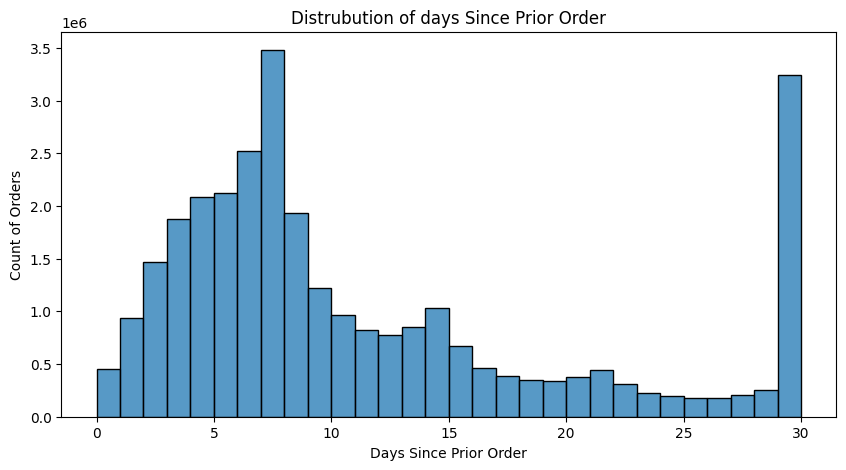

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(complete_df['days_since_prior_order'],bins=30,kde=False)
plt.title("Distrubution of days Since Prior Order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Count of Orders")
plt.show()

Top 30 Product Orderd

Text(0.5, 1.0, 'Top 30 Product Ordred')

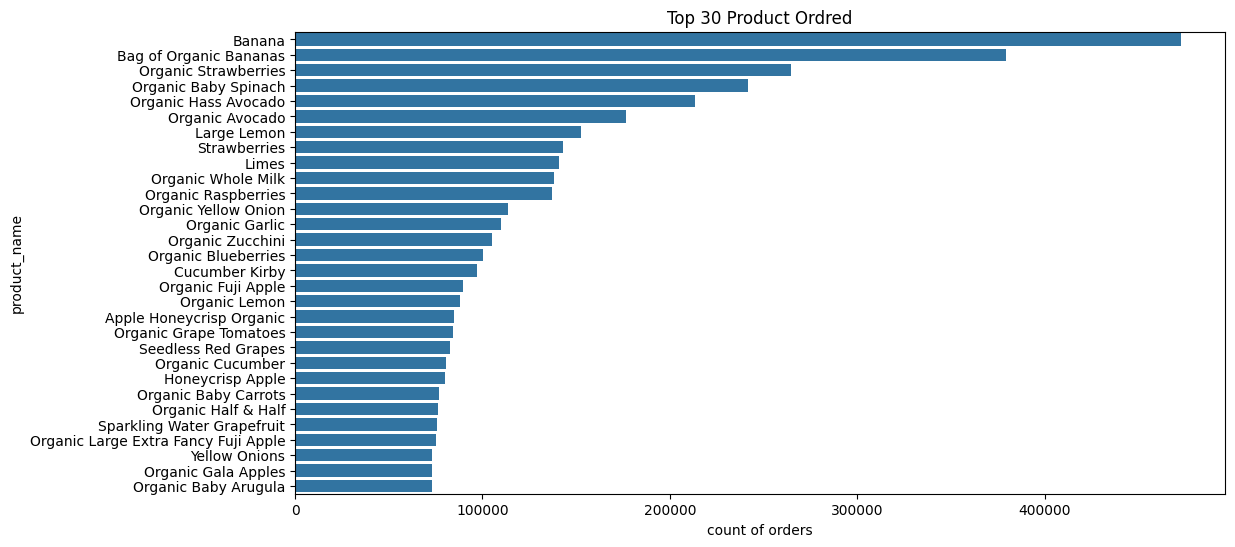

In [13]:
most_ordered=complete_df['product_name'].value_counts().head(30)
plt.figure(figsize=(12,6))
sns.barplot(x=most_ordered,y=most_ordered.index)
plt.xlabel("count of orders")
plt.title("Top 30 Product Ordred")

Day Of Week Plot

<Axes: xlabel='order_dow', ylabel='Count'>

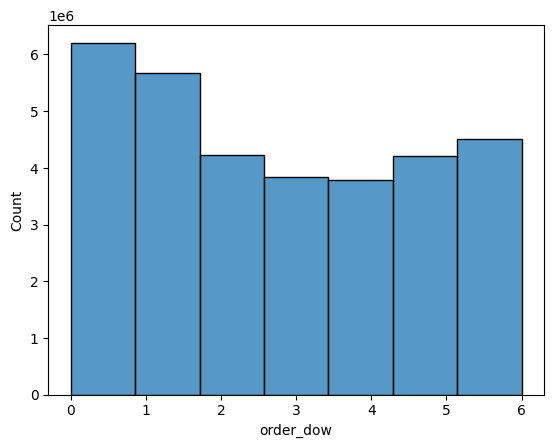

In [14]:
sns.histplot(complete_df['order_dow'],bins=7,kde=False)

Order Per department

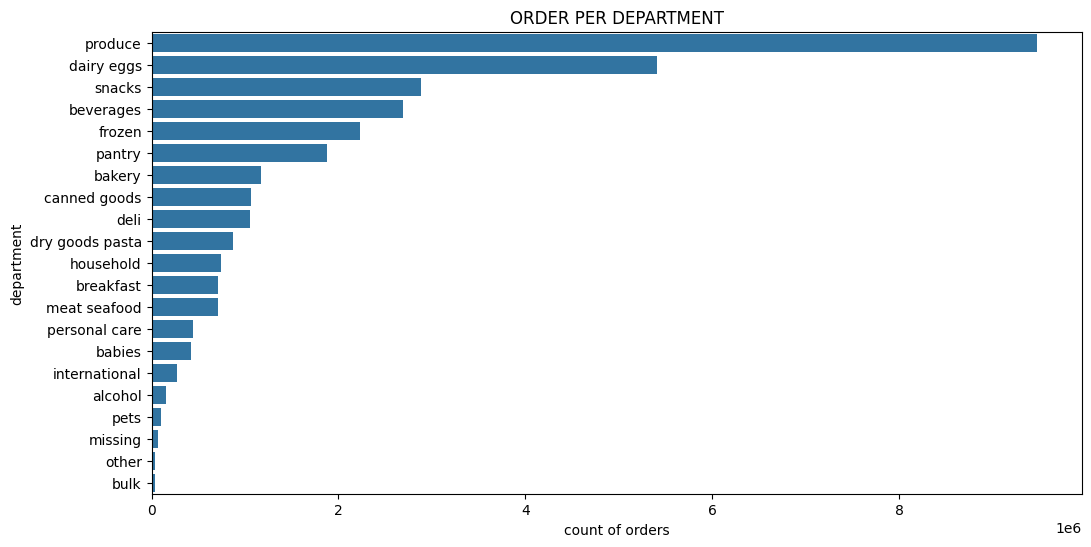

In [15]:
top_departments=complete_df['department'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_departments,y=top_departments.index)
plt.xlabel("count of orders")
plt.title("ORDER PER DEPARTMENT")
plt.show()

Number of orders per users

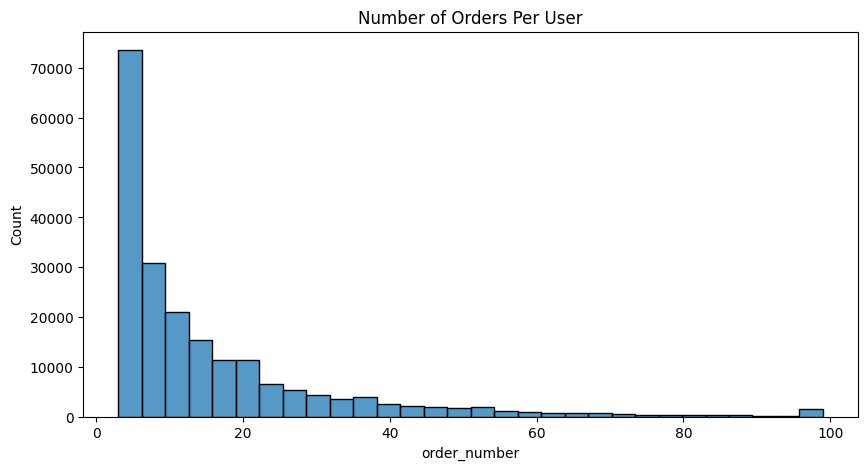

In [16]:
user_order=complete_df.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,5))
sns.histplot(user_order,bins=30)
plt.title("Number of Orders Per User")
plt.show()


Reorderd Vs orderd


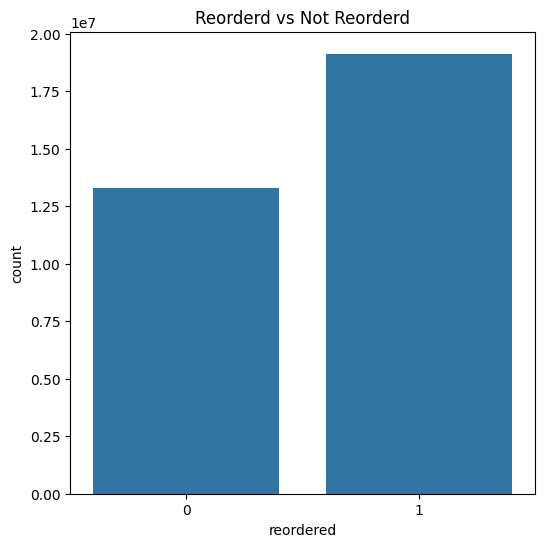

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x=complete_df['reordered'])
plt.title("Reorderd vs Not Reorderd")
plt.show()

The Top 20 aisle

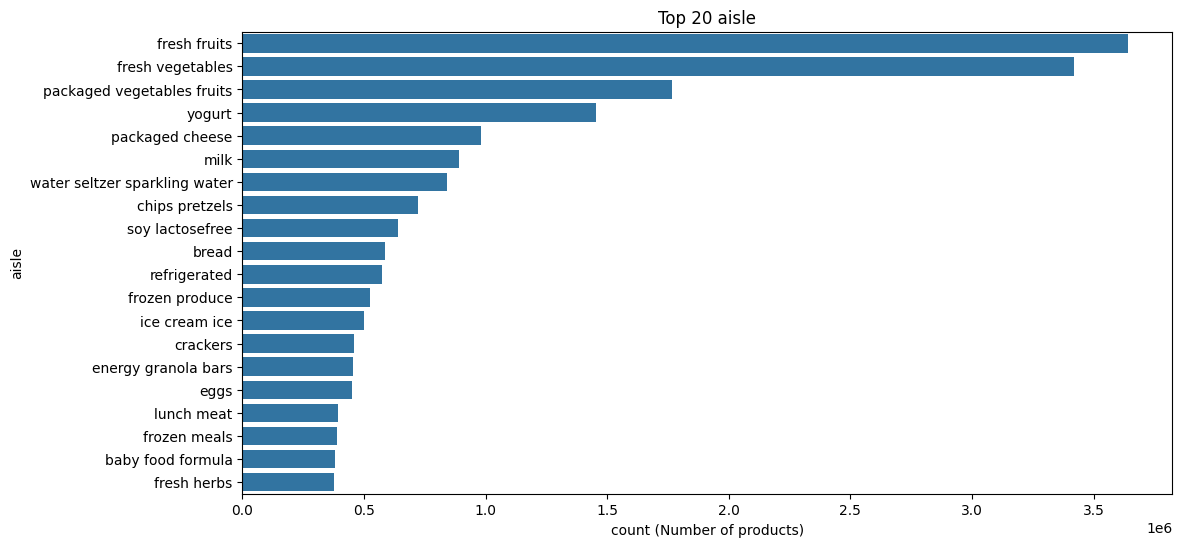

In [18]:
top_aisle=complete_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_aisle,y=top_aisle.index)
plt.title("Top 20 aisle")
plt.xlabel("count (Number of products)")
plt.ylabel("aisle")
plt.show()

REorder VS Order number

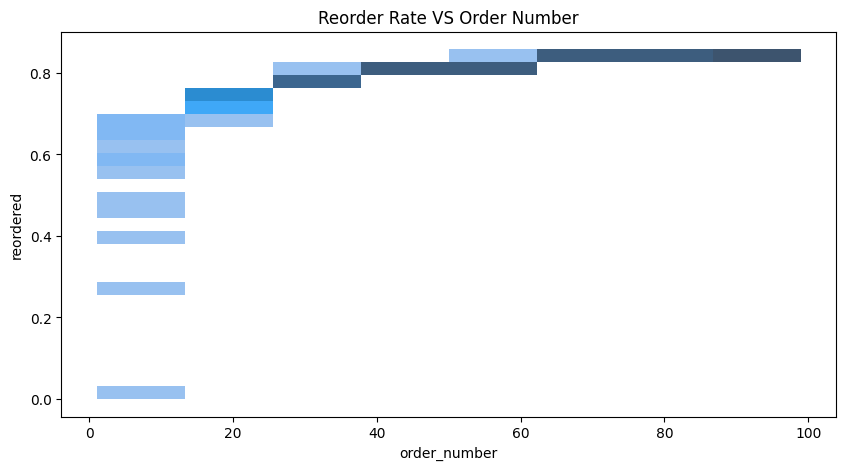

In [19]:
order_ordernum=complete_df.groupby('order_number')['reordered'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.histplot(data=order_ordernum,x='order_number',y='reordered')
plt.title("Reorder Rate VS Order Number")
plt.show()

Handle Numrical Features

In [20]:
num_cols=complete_df.select_dtypes(include=['int32','float32','int64','float64']).columns
num_cols

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id',
       'department_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')

Handle Categorical Features

In [21]:
cat_cols=complete_df.select_dtypes(include=['object']).columns
cat_cols

Index(['product_name', 'department', 'aisle', 'eval_set'], dtype='object')

Correlation For Numrical Featuers ("Heatmap")

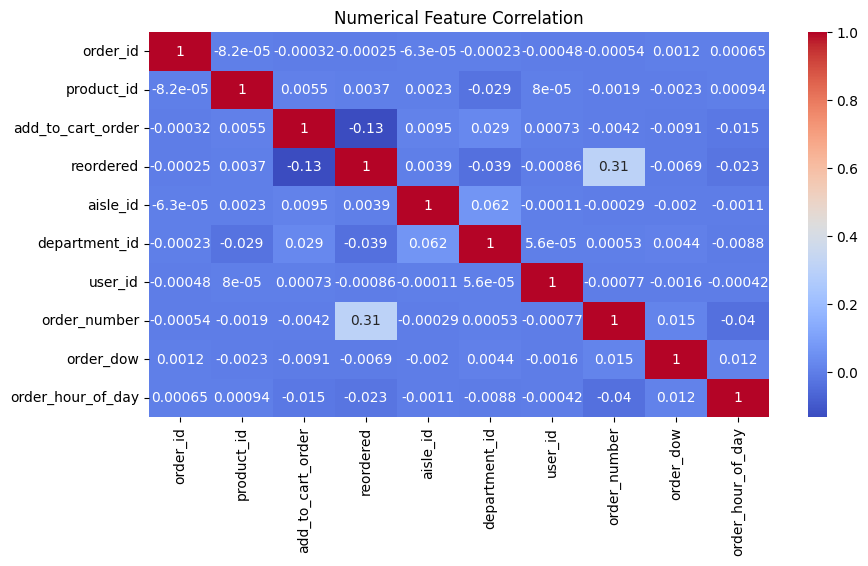

In [22]:
plt.figure(figsize=(10,5))
correlation_matrix=complete_df[num_cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Numerical Feature Correlation")
plt.show()

Correlation For Numrical Featuers ("pairwise scatter")

<Figure size 800x900 with 0 Axes>

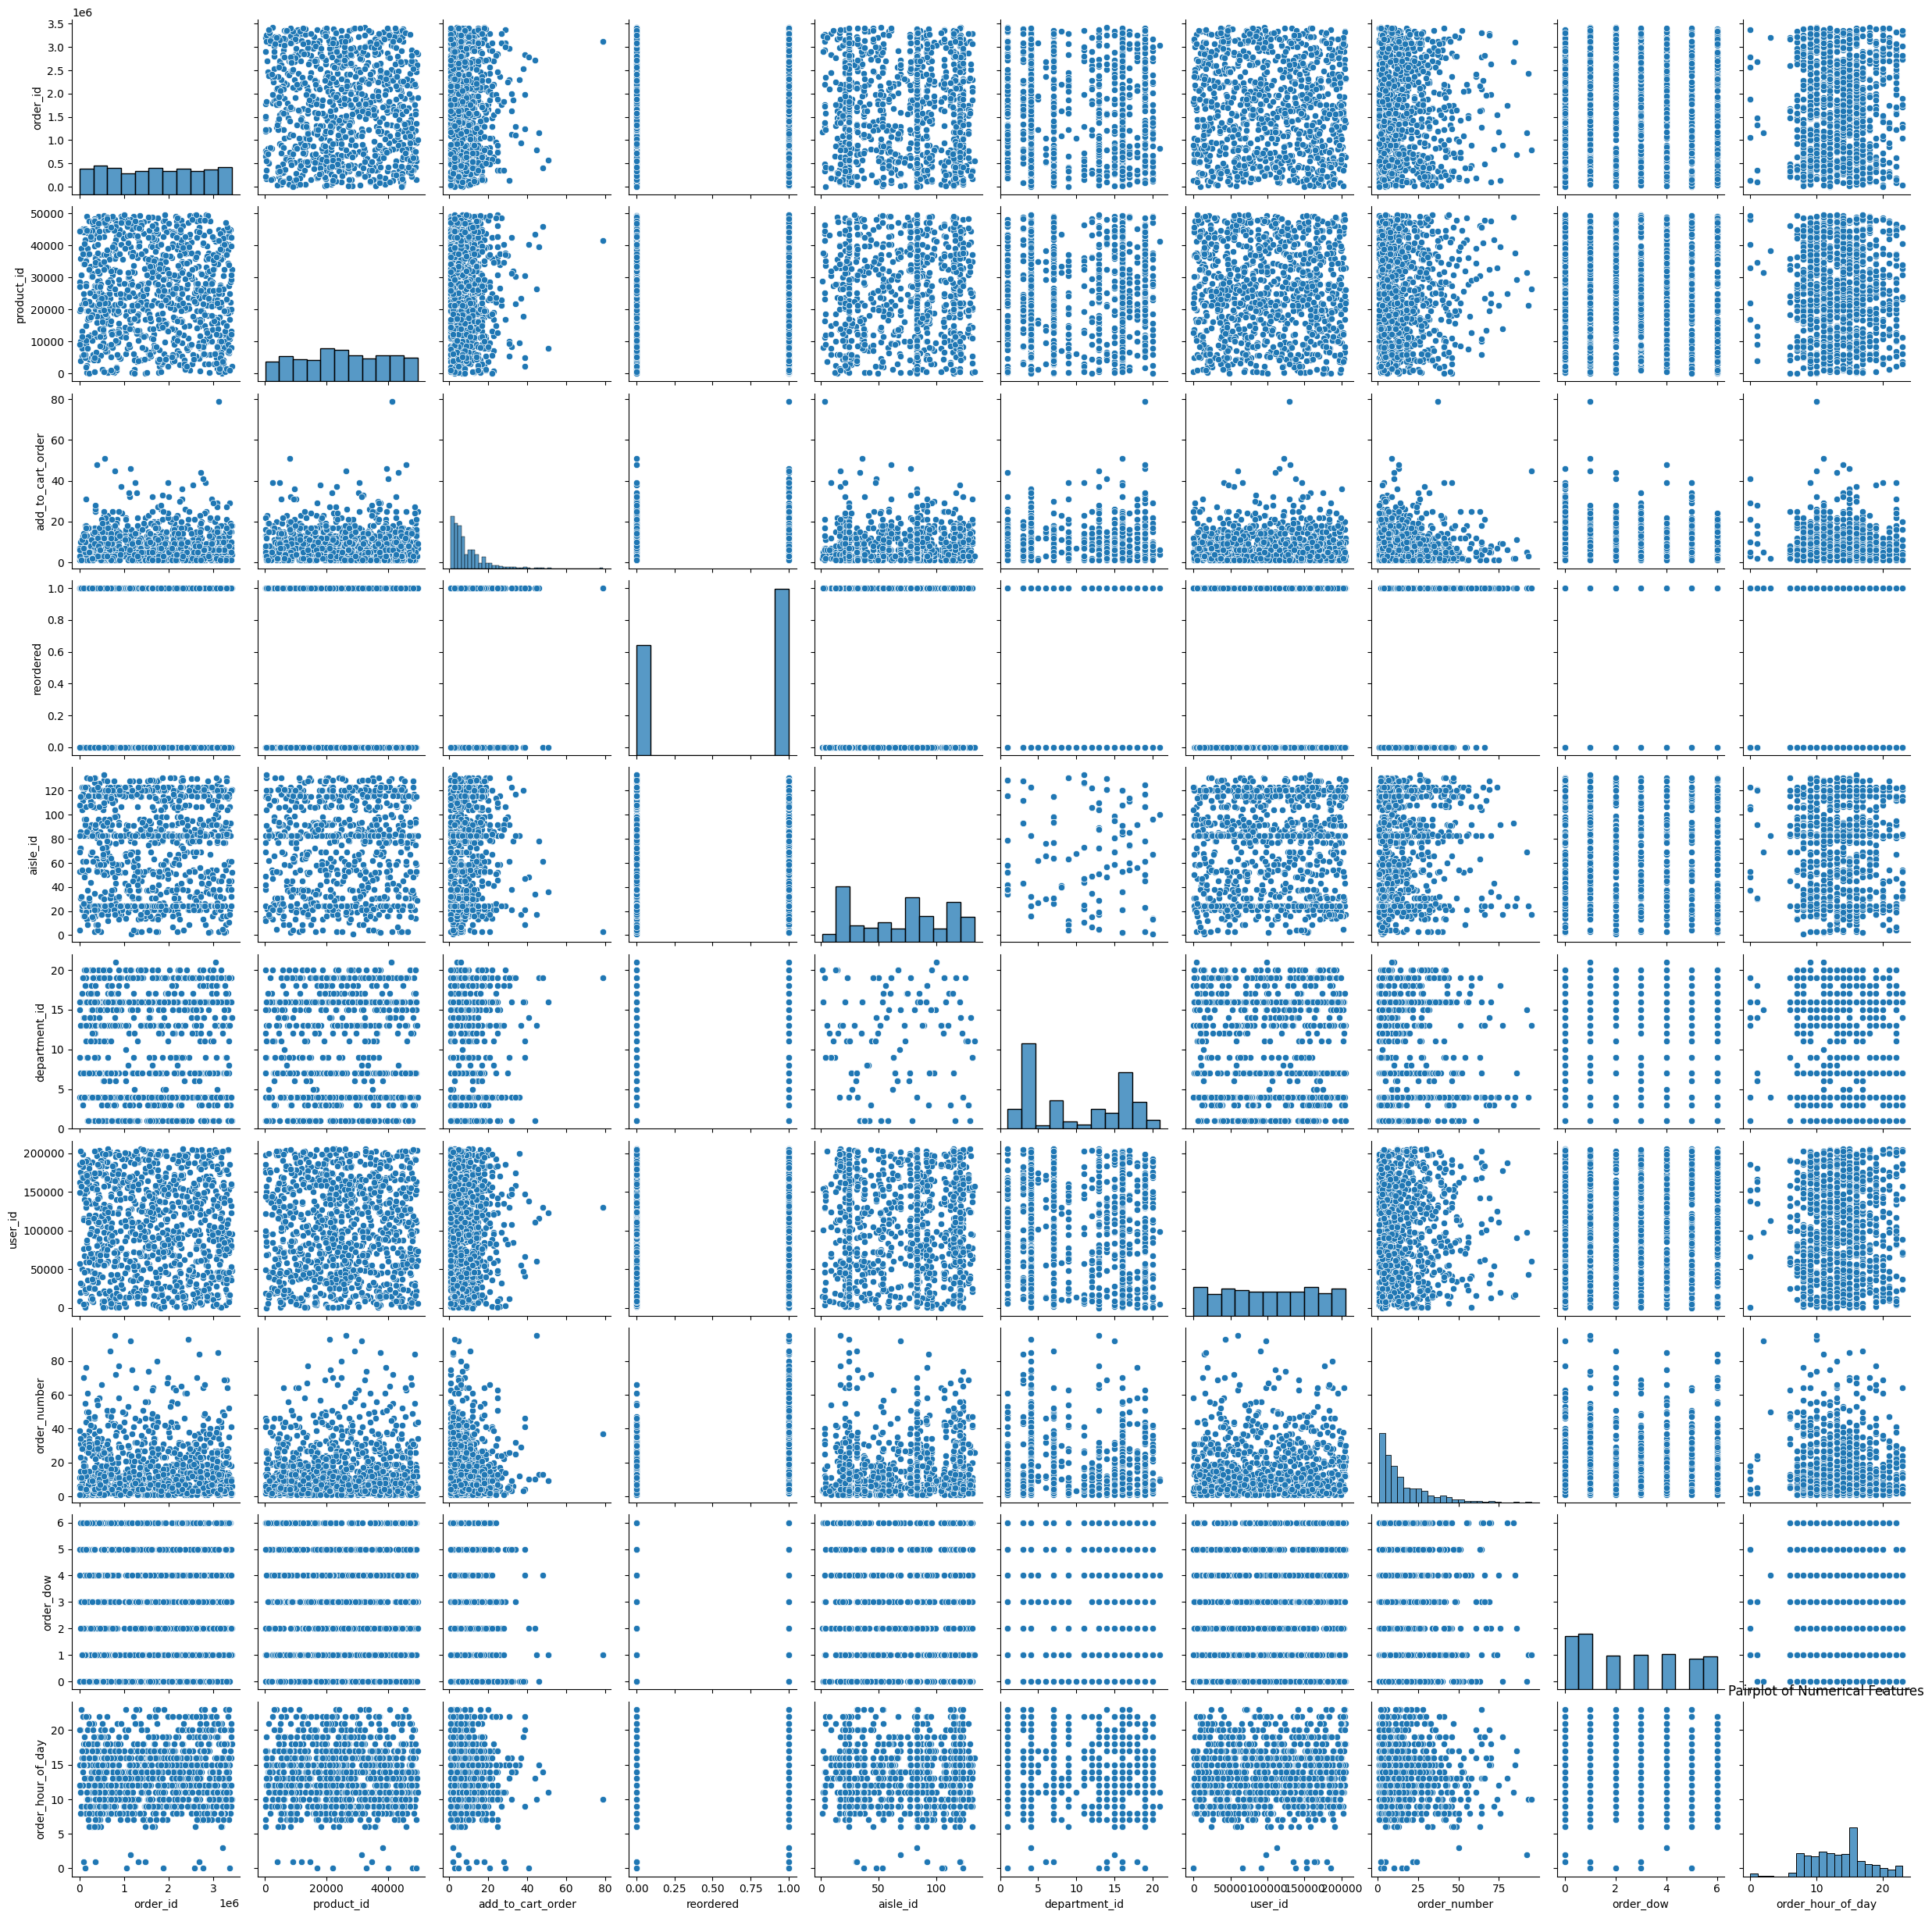

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,9))
sample_df=complete_df.sample(1000,random_state=42)
sns.pairplot(sample_df[num_cols])
plt.title("Pairplot of Numerical Features")
plt.show()

Time Of Day plot

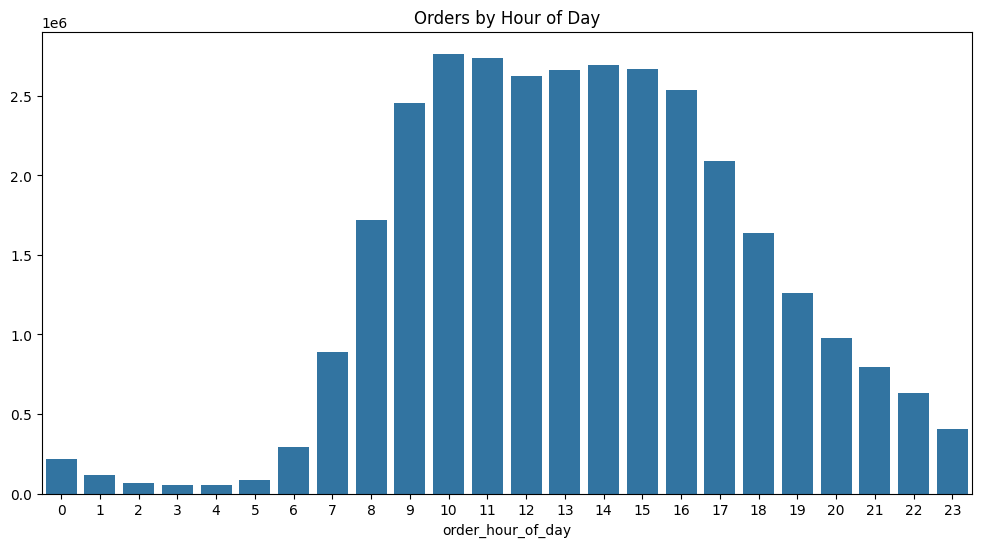

In [24]:
whole_day=complete_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=whole_day.index,y=whole_day.values)
plt.title("Orders by Hour of Day")
plt.show()


Orders in the Whole Week

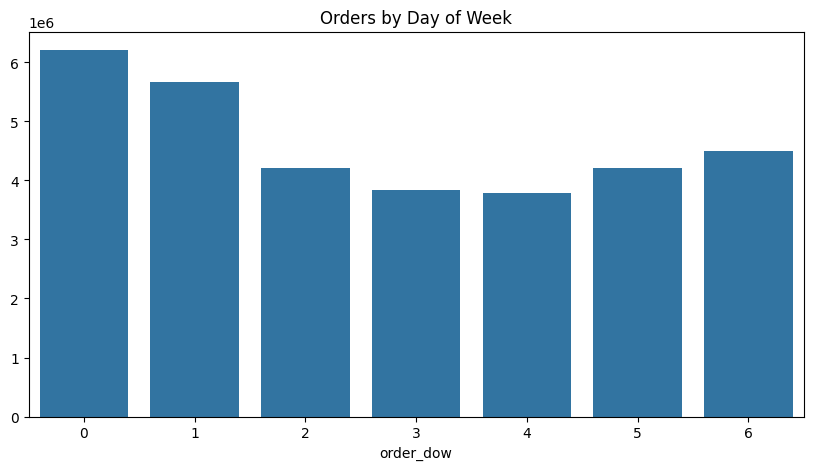

In [25]:
whole_week=complete_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=whole_week.index,y=whole_week.values)
plt.title("Orders by Day of Week")
plt.show()

In [26]:
# --- IGNORE ---

HANDLE MISSING VALUE

In [27]:
missing_value= complete_df.isnull().sum()
missing_value

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

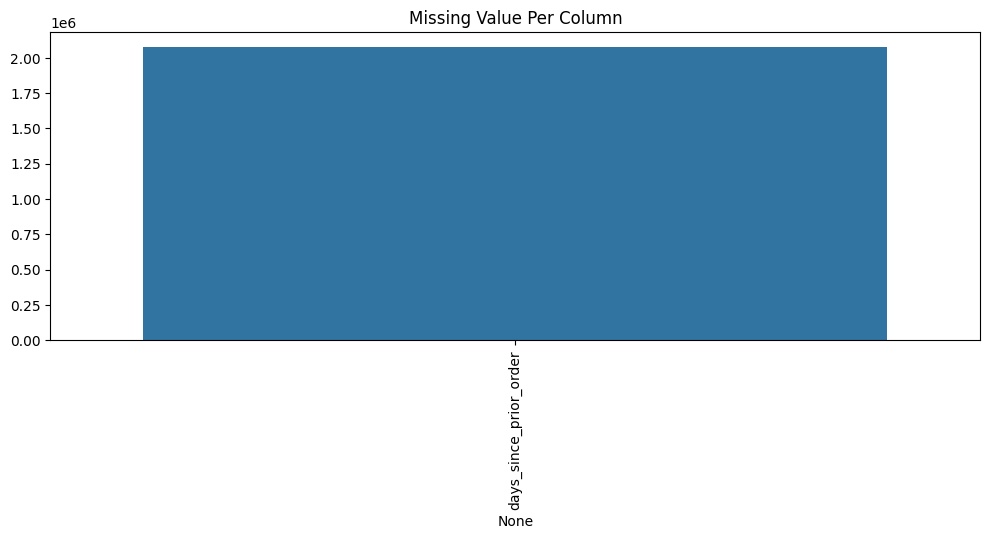

In [28]:
missing_count=complete_df.isnull().sum()
missing_count=missing_count[missing_count>0].sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=missing_count.index,y=missing_count.values)
plt.xticks(rotation=90)
plt.title("Missing Value Per Column")
plt.show()

In [29]:
print ("..")

..


3. Cleaning & Imputation

Median Imputation

In [30]:
from sklearn.impute import SimpleImputer
median_df=complete_df.copy()
median_imputer=SimpleImputer(strategy='median')
median_df['days_since_prior_order']=median_imputer.fit_transform(median_df[['days_since_prior_order']])
median_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

 Median Visualize

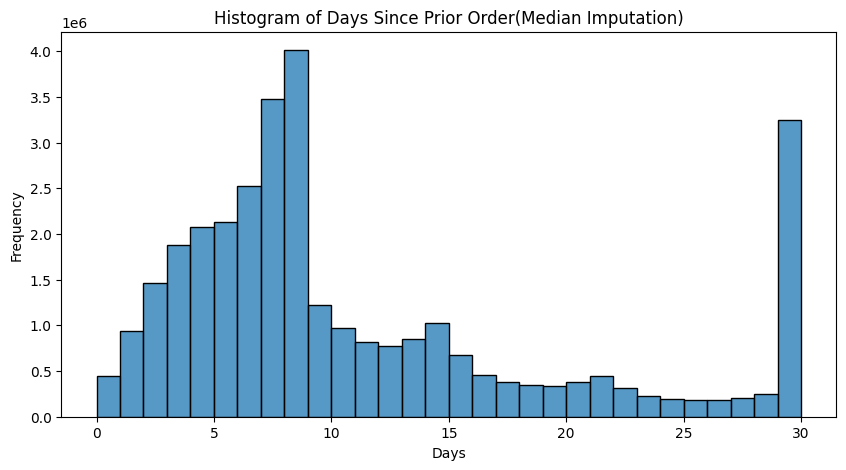

In [31]:
median_df.isnull().sum()
plt.figure(figsize=(10,5))
sns.histplot(median_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order(Median Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Most Frequent (Mode) Imputation

In [32]:
from sklearn.impute import SimpleImputer
freq_df=complete_df.copy()
freq_imputer = SimpleImputer(strategy='most_frequent')
freq_df['days_since_prior_order'] = freq_imputer.fit_transform(freq_df[['days_since_prior_order']])
freq_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Most Frequent (Mode) Visualize

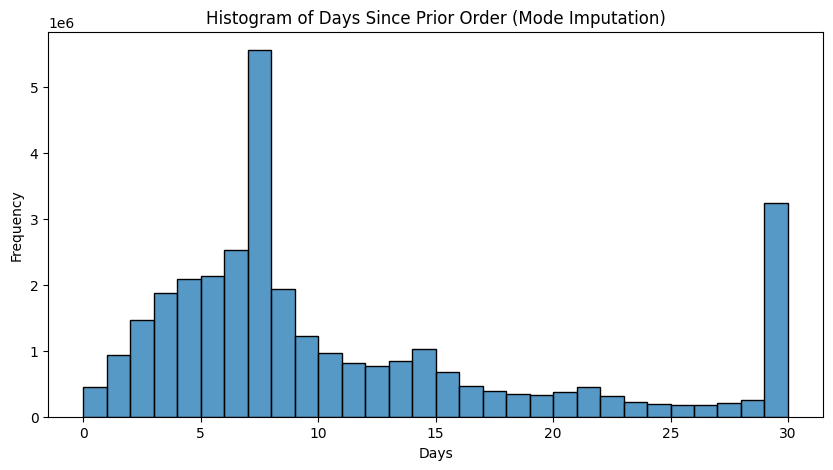

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(freq_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Mode Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Sentinel Imputation (الي رح نعتمده)

In [34]:
from sklearn.impute import SimpleImputer
sentinel_df=complete_df.copy()
sentinel_vl=0
sentinel_df['days_since_prior_order']=sentinel_df['days_since_prior_order'].fillna(sentinel_vl)
sentinel_df.isnull().sum()



order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [35]:
complete_df['days_since_prior_order']=complete_df['days_since_prior_order'].fillna(sentinel_vl)

Sentinel Visualize

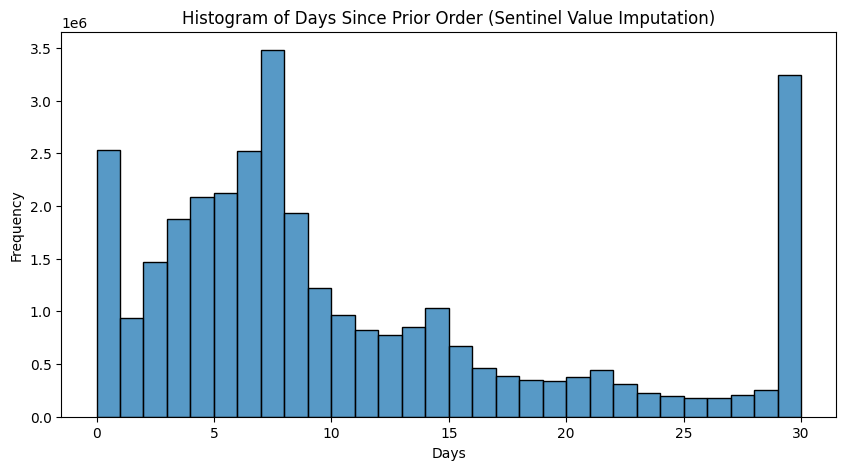

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(sentinel_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Sentinel Value Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Model-Based Imputation (KNN Imputer)

In [37]:
from sklearn.impute import KNNImputer
sample_knn = complete_df.sample(100000, random_state=42)
knn_imputer = KNNImputer(n_neighbors=5)
knn_sample_df = sample_knn.copy()
knn_sample_df[['days_since_prior_order']] = knn_imputer.fit_transform(knn_sample_df[['days_since_prior_order']])
knn_sample_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Model Based Visualize

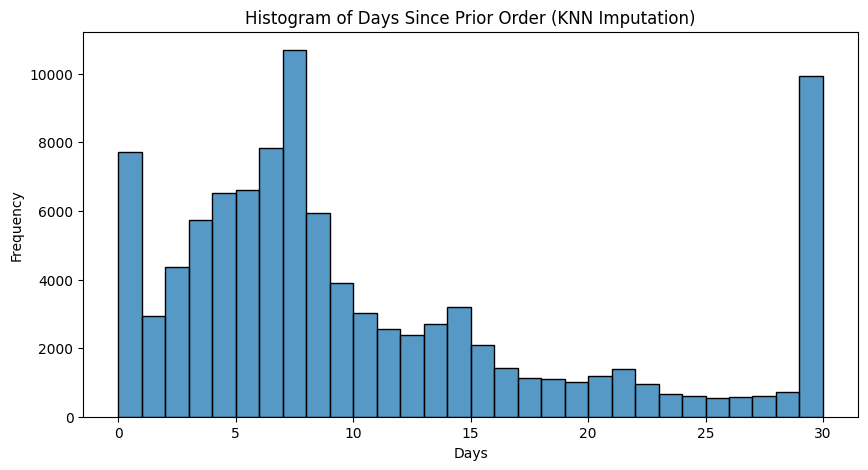

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(knn_sample_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (KNN Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [39]:
print("hkjkjhkj")

hkjkjhkj


3-Outlier Detection & Treatment (Z-Score Method)

In [40]:
outlier_columns = []
for col in complete_df.select_dtypes(include=['int', 'float']):
    Q1 = complete_df[col].quantile(0.25)
    Q3 = complete_df[col].quantile(0.75)
    IQR = Q3 - Q1

    if ((complete_df[col] < (Q1 - 1.5 * IQR)) | (complete_df[col] > (Q3 + 1.5 * IQR))).any():
        outlier_columns.append(col)

print("Outlier columns:", outlier_columns)


Outlier columns: ['add_to_cart_order', 'order_number', 'order_hour_of_day']


In [41]:
import numpy as np
mean_val =complete_df[outlier_columns].mean()
std_val  = complete_df[outlier_columns].std()
z_score = (complete_df[outlier_columns]- mean_val) / std_val
z_score


,add_to_cart_order,order_number,order_hour_of_day
0,-1.031488,-0.806502,-1.042062
1,-0.891170,-0.806502,-1.042062
2,-0.750852,-0.806502,-1.042062
3,-0.610534,-0.806502,-1.042062
4,-0.470216,-0.806502,-1.042062
...,...,...,...
32434484,-0.329898,0.391100,-1.748549
32434485,-0.189580,0.391100,-1.748549
32434486,-0.049262,0.391100,-1.748549
32434487,0.091056,0.391100,-1.748549



Extracting Outliers

In [42]:
outlier_z = z_score[(z_score > 3) | (z_score < -3)]
print(outlier_z.shape)
len(outlier_z)

(32434489, 3)


32434489

Boxplot Before Removing Outliers (Z-score) Visualize

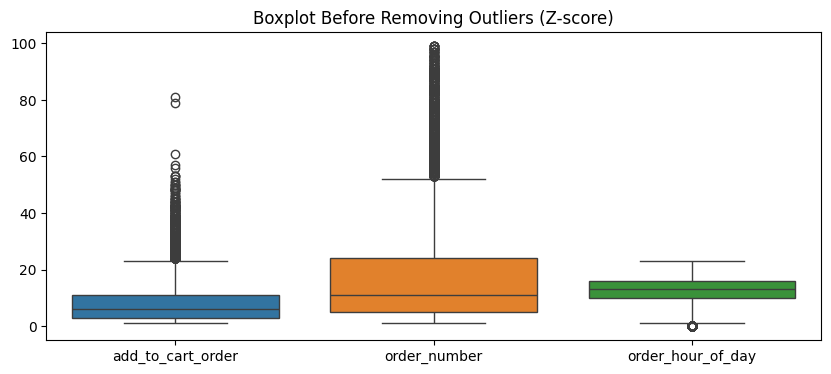

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sample_df=complete_df.sample(20000,random_state=42)
sns.boxplot(data=sample_df[outlier_columns])
plt.title("Boxplot Before Removing Outliers (Z-score)")
plt.show()


Histogram Before Removing Outliers (Z-score) Visualize

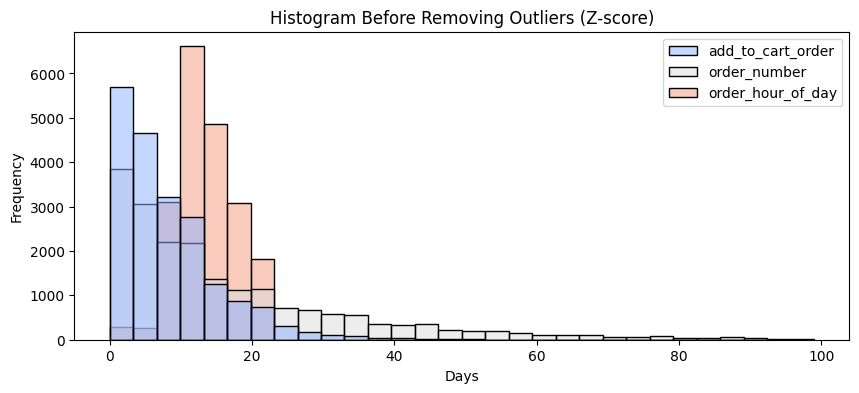

In [44]:
plt.figure(figsize=(10,4))
sns.histplot(data=sample_df[outlier_columns], bins=30, kde=False,palette="coolwarm")
plt.title("Histogram Before Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Removing Outliers

In [45]:
clean_z_df =sample_df[(z_score <= 3) & (z_score >= -3)]
clean_z_df.shape

(20000, 15)

Boxplot After Removing Outliers

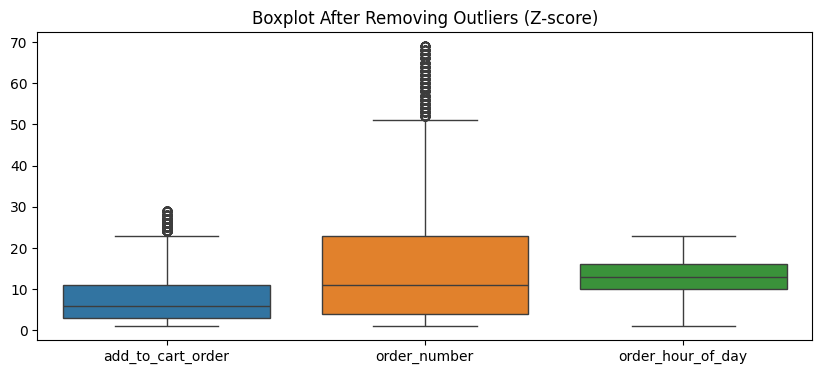

In [46]:
plt.figure(figsize=(10,4))
sns.boxplot(data=clean_z_df[outlier_columns])
plt.title("Boxplot After Removing Outliers (Z-score)")
plt.show()


Histogram After Removing Outliers

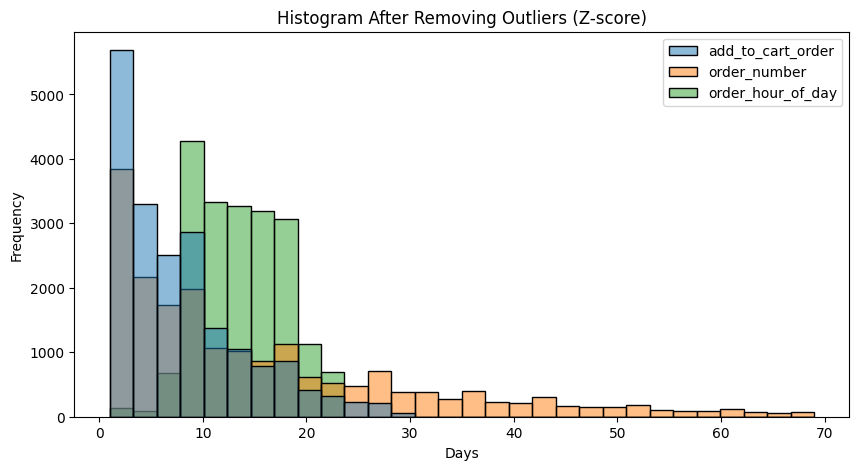

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data=clean_z_df[outlier_columns], bins=30, kde=False)
plt.title("Histogram After Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

4-Encoding Categorical Variables

One-Hot Encoding (for low-cardinality categories)

In [48]:
complete_df=complete_df.copy()
complete_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int32  
 3   reordered               int32  
 4   product_name            object 
 5   aisle_id                int32  
 6   department_id           int32  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int32  
 10  eval_set                object 
 11  order_number            int32  
 12  order_dow               int32  
 13  order_hour_of_day       int32  
 14  days_since_prior_order  float16
dtypes: float16(1), int32(10), object(4)
memory usage: 2.2+ GB


In [49]:
low_card= ['department', 'aisle']
complete_df = pd.get_dummies(
    complete_df,
    columns=low_card,
    drop_first=True,
    sparse=True)
complete_df
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Columns: 166 entries, order_id to aisle_yogurt
dtypes: Sparse[bool, False](153), float16(1), int32(10), object(2)
memory usage: 2.1+ GB


In [50]:
complete_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False


In [51]:
complete_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False


In [52]:
from sklearn.model_selection import KFold
df= complete_df.copy()
target='reordered'#اللي بدنا نحسب متوسطه
global_mean=df[target].mean()
global_mean


np.float64(0.5896974667922161)

5. Feature Scaling

Feature Scaling("StandardScaler")

In [53]:
from sklearn.preprocessing import StandardScaler
standard_df=complete_df.copy()
scaler=StandardScaler()
standard_df[num_cols]=scaler.fit_transform(complete_df[num_cols])
standard_df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,-1.732751,0.535137,-1.031488,0.834137,Organic Egg Whites,0.387029,0.967671,1.670551,prior,-0.806502,...,False,False,False,False,False,False,False,False,False,False
1,-1.732751,0.241806,-0.891170,0.834137,Michigan Organic Kale,0.308502,-0.942805,1.670551,prior,-0.806502,...,False,False,False,False,False,False,False,False,False,False
2,-1.732751,-1.152706,-0.750852,-1.198844,Garlic Powder,0.858196,0.490052,1.670551,prior,-0.806502,...,False,False,False,False,False,False,False,False,False,False
3,-1.732751,1.443010,-0.610534,0.834137,Coconut Butter,-1.366758,0.490052,1.670551,prior,-0.806502,...,False,False,False,False,False,False,False,False,False,False
4,-1.732751,0.316291,-0.470216,-1.198844,Natural Sweetener,-1.419110,0.490052,1.670551,prior,-0.806502,...,False,False,False,False,False,False,False,False,False,False


Feature Scaling("MinMaxScaler")

In [54]:
from sklearn.preprocessing import MinMaxScaler
min_max_df=complete_df.copy()
MMS=MinMaxScaler()
min_max_df[num_cols]=MMS.fit_transform(complete_df[num_cols])
min_max_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,0.0,0.666553,0.000000,1.0,Organic Egg Whites,0.639098,0.75,0.980942,prior,0.020408,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.583332,0.006944,1.0,Michigan Organic Kale,0.616541,0.15,0.980942,prior,0.020408,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.187695,0.013889,0.0,Garlic Powder,0.774436,0.60,0.980942,prior,0.020408,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.924125,0.020833,1.0,Coconut Butter,0.135338,0.60,0.980942,prior,0.020408,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.604464,0.027778,0.0,Natural Sweetener,0.120301,0.60,0.980942,prior,0.020408,...,False,False,False,False,False,False,False,False,False,False


In [55]:
complete_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False


6- Feature Enginnering

In [93]:
df = pd.DataFrame(complete_df , columns = complete_df.columns)
df.isnull().sum()

C:\Users\owndi\AppData\Local\Temp\ipykernel_23324\3863764140.py:2: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.isnull().sum()
c:\Users\owndi\anaconda3\Lib\site-packages\IPython\lib\pretty.py:794: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  output = repr(obj)


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
                    ..
order_hour           0
order_day            0
order_year           0
order_month          0
order_season         0
Length: 171, dtype: Sparse[int64, False]

-User Level Features

In [ ]:
user_total_orders = df.groupby('user_id')['order_number'].max().reset_index()
user_total_orders.columns = ['user_id', 'user_total_orders']

basket_data = df.groupby('user_id').agg({ 'product_id':'count', 'order_number': 'max'}).reset_index()
basket_data.columns = ['user_id', 'total_products_ordered', 'total_orders']
basket_data

basket_data['avg_basket_size'] = basket_data['total_products_ordered'] / basket_data['total_orders']
user_features = df.groupby('user_id').agg({
      # 1. Total #Orders
    'order_number': 'max',       
    # 2. عشان نعرف كم منتج اشتراها كل زبون بشكل كامل
     'product_id': 'count',       
    # 3. Reorder Ratio
    'reordered': 'mean',         

   #هون حسبنا اخر مطلوبين بخطوه وحده بدل ما نعمل قروب باي مرتين
    'days_since_prior_order': ['mean', 'last'] 
}).reset_index()


,user_id,total_products_ordered,total_orders
0,1,59,10
1,2,195,14
2,3,88,12
3,4,18,5
4,5,37,4
...,...,...,...
206204,206205,32,3
206205,206206,285,67
206206,206207,223,16
206207,206208,677,49


In [ ]:
user_features.columns = ['user_id',  'user_total_orders',  'user_total_items', 'user_reorder_ratio','user_avg_days_between', 'user_days_since_last_order'  ]
user_features['user_avg_basket_size'] = user_features['user_total_items'] / user_features['user_total_orders'] #size of basket


- Product-level features

In [ ]:
# --- Product-Level Features ---

# يا جماعة، هالمرة التجميع (Grouping) رح يكون based عـالمنتج (Product) مش عـاليوزر، عشان نطلع بخصائص للمنتج نفسه
product_features = DF.groupby('product_id').agg({
    
    # 1. Popularity (شعبية المنتج)
    # هون الفكرة بدنا نقيس "شعبية" المنتج، يعني كم مرة انباع فعلياً.
    'user_id': 'count',  
    # ليش اخترنا user_id وعملنا count؟ 
    # بسيطة، لأنه كل سطر بالداتا بيمثل عملية شراء، فـ لما نعدهم بنعرف كم مرة هالمنتج انطلب.
   # -----------------------------------------------------------------------------------------------------------------------------

    # 2. Reorder Rate (معدل إعادة الطلب)
    # هون حسبنا متوسط (Mean) عمود الـ reordered.
    'reordered': 'mean', 
    # الهدف نعرف قديش نسبة احتمالية إنه المنتج يرجع ينطلب مرة ثانية (يعني الزباين "بيدمنوا" عليه ولا لأ).
    # -----------------------------------------------------------------------------------------------------------------------------

    # 3. Average Cart Position (متوسط ترتيبه بالسلة)
    # بجوز تسألوني ليش ركزنا عـ هالعامود (add_to_cart_order)؟
    # لأنه بيمثل "أولوية" المنتج عند الزبون.
    'add_to_cart_order': 'mean' 
    # لما ناخذ الـ Mean، بنعرف المنتج وين بكون ترتيبه بالسلة عادةً (هل هو من الأساسيات اللي بتنحط أول شي، ولا كماليات بالأخر).
    
}).reset_index()

# هون بس رتبنا الأسامي عشان تكون واضحة ومعبرة لما نستخدمها بعدين
product_features.columns = [ 'product_id', 'product_total_purchases', 'product_reorder_rate', 'product_avg_cart_position' ]

display(product_features.head())

,product_id,prod_total_orders,prod_reorder_ratio,prod_avg_pos
0,1,1852,0.613391,5.801836
1,2,90,0.133333,9.888889
2,3,277,0.732852,6.415162
3,4,329,0.446809,9.507599
4,5,15,0.600000,6.466667


User×Product interaction features

In [100]:
# --- User x Product Interaction Features ---

# ملاحظة: ما بنحتاج ندمج user_days_since_last_order هون، لأنه الحسبة الها طريقة أذكى.

uxp_features = df.groupby(['user_id', 'product_id']).agg({
    # 1. Total Purchases (عدد مرات الشراء)
    # هون استخدمنا reordered وعملنا count عشان نعد كم مرة السطر تكرر (يعني كم مرة الزبون اشترى هالمنتج).
    # زي ما حكيت، اخترنا هاد العمود اختصاراً عشان رح نستخدمه تحت كمان.
    'reordered': ['count', 'mean'], 
    
    # 2. Reorder Probability (احتمالية الإعادة)
    # لما ناخذ الـ mean لنفس العمود، بيعطينا النسبة: قديش احتمالية يرجع يطلبه؟
    
    # 3. Last Order Number (رقم آخر طلب ظهر فيه المنتج)
    # بدال ما نوجع راسنا بالأيام هسا، بناخذ "رقم آخر طلب" اشترى فيه المنتج.
    # بعدين لما ندمج مع جدول الـ Train، بنطرح (رقم الطلب الحالي - رقم آخر طلب).
    # هاي الطريقة أضمن وأدق وحدة بالداتا ساينس لهيك نوع من الداتا.
    'order_number': 'max'
}).reset_index()

# ترتيب وتسمية الأعمدة بشكل واضح
uxp_features.columns = [
    'user_id', 
    'product_id', 
    'uxp_total_bought',       # كم مرة اشترى المنتج
    'uxp_reorder_ratio',      # نسبة إعادة الطلب
    'uxp_last_order_num'      # رقم آخر طلب اشترى فيه المنتج (عشان نحسب Recency بعدين)
]

# عرض النتيجة
display(uxp_features.head(20))

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_last_order_num
0,1,196,10,0.900000,10
1,1,10258,9,0.888889,10
2,1,10326,1,0.000000,5
3,1,12427,10,0.900000,10
4,1,13032,3,0.666667,10
5,1,13176,2,0.500000,5
6,1,14084,1,0.000000,1
7,1,17122,1,0.000000,5
8,1,25133,8,0.875000,10
9,1,26088,2,0.500000,2


Temporal features

In [91]:
complete_df['order_hour']=complete_df['order_hour_of_day']#Hour

complete_df['order_day']=complete_df['order_dow']#Day

start_year=2024
days_per_year=365
complete_df['order_year'] = start_year +complete_df['days_since_prior_order']//days_per_year #Year
complete_df['order_month'] = ((complete_df['days_since_prior_order'] % days_per_year) // 30) + 1 #Month

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
complete_df['order_season'] = complete_df['order_month'].apply(get_season)#Season



#Holiday

In [102]:
                                                                                              #جزء من temporal features ممكن انه نعملها 

def time_of_day(hour):
    if 6 <= hour < 11:                                                                        # بحيث انه اقسم الوقت صبح ومسا وهيك
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 18 <= hour < 23:
        return 'Evening'
   
    else:
        return 'Night'
df['time_of_day'] = df['order_hour_of_day'].apply(time_of_day)
print(df['time_of_day'].head(10))

0    Morning
1    Morning
2    Morning
3    Morning
4    Morning
5    Morning
6    Morning
7    Morning
8    Morning
9      Night
Name: time_of_day, dtype: object


In [ ]:
# قاعد بفكر باشي ممكن اني اعمله واستنتجه للبيانات الزمنية (temporal features)
# حضيف الويكند ويكون بوليان اذا صفر بكون دوام واذا واجد عطلة
df['is_weekend'] = df['order_dow'].apply(lambda x: 1 if x in [0, 1] else 0)
#[0,1] بتمثل الايام السبت والاحد الي هي ايام العطلة عندهم

Aggregations over windows (e.g., last 3 orders, last 6 months).

In [104]:
# --- 5. Aggregations over Windows (Recent Behavior) ---

#   الزبون بغير عاداته. ممكن زمان كان يشتري قليل، وهسا صار "حوت".
# عشان هيك، بدنا نركز عـ "آخر 3 طلبات" عشان نمسك الـ Trend الحالي تبعه.

# 1. تجهيز الداتا على مستوى "الطلب" (Order Level)
# الداتا اللي معنا (df) مفصلة (منتج-منتج)، إحنا بدنا نلخصها تصير (طلب-طلب)
# عشان نقدر نحكي: الطلب الأول كان حجمه كذا، والطلب الثاني كذا...
order_metrics = df.groupby(['user_id', 'order_number']).agg({
    'product_id': 'count',            # حجم السلة (كم حبة اشترى بالطلب)
    'days_since_prior_order': 'max'   # كم يوم غاب قبل هاد الطلب
}).reset_index()

# بنرتب الأسماء عشان نكون دقيقين
order_metrics.rename(columns={
    'product_id': 'basket_size',
    'days_since_prior_order': 'days_gap'
}, inplace=True)

# 2. الترتيب الزمني (خطوة مقدسة!)
# لازم نرتب تصاعدي عشان لما نقول "آخر 3" يكونوا عنجد آخر 3
order_metrics = order_metrics.sort_values(['user_id', 'order_number'])

# 3. الفنكشن السحري (Rolling Function)
# كتبناه برا عشان الكود يضل نظيف ومقروء
def get_recent_avg(x):
    # window=3: يعني خذلك آخر 3 قيم بس
    # min_periods=1: عشان اليوزر الجديد اللي عنده طلب واحد ما ينظلم ويطلعله NaN
    return x.rolling(window=3, min_periods=1).mean()

# 4. التطبيق (Execution)
# هسا بنطبق الفنكشن على كل يوزر لحال
# . متوسط حجم السلة بآخر 3 طلبات
order_metrics['avg_basket_last_3'] = order_metrics.groupby('user_id')['basket_size'].transform(get_recent_avg)

# . متوسط أيام الغياب بآخر 3 طلبات (هل صار يطلب بوتيرة أسرع؟)
order_metrics['avg_days_gap_last_3'] = order_metrics.groupby('user_id')['days_gap'].transform(get_recent_avg)

# 5. الخلاصة (Final Snapshot)
# احنا بهمنا "آخر وضع" وصله الزبون قبل ما ندخل عـ التوقع
user_rolling_features = order_metrics.groupby('user_id').last().reset_index()

# بننظف الجدول وبنخلي بس الأعمدة الجديدة
user_rolling_features = user_rolling_features[['user_id', 'avg_basket_last_3', 'avg_days_gap_last_3']]

# بنعرض عينة عشان نتأكد إن الأمور طيبة
print("تم استخراج ميزات الـ Rolling Window بنجاح!")
display(user_rolling_features.head(10))

تم استخراج ميزات الـ Rolling Window بنجاح!


,user_id,avg_basket_last_3,avg_days_gap_last_3
0,1,7.000000,14.666667
1,2,14.666667,23.666667
2,3,5.666667,14.333333
3,4,4.000000,12.000000
4,5,8.666667,13.333333
5,6,4.666667,6.000000
6,7,10.000000,5.666667
7,8,16.333333,20.000000
8,9,25.333333,12.000000
9,10,30.666667,16.333333


At least one engineered non-linear feature (log transforms, polynomial, interaction
terms).


In [106]:
# 2. Log Transform (التحويل اللوغاريتمي)
# عمود "أيام الغياب" (days_since_prior_order) عادة بكون "مايل" (Skewed).
# يعني في ناس كثير بتغيب يوم، وناس قليل بتغيب 30 يوم.
# اللوغاريتم "بفعص" الأرقام الكبيرة وبفرد الأرقام الصغيرة، فبخلي التوزيع "طبيعي" (Normal Distribution) والموديل بحبه أكثر.

# استخدمنا log1p يعني log(x + 1) عشان لو في أصفار ما يضرب الكود (لأنه لوغاريتم الصفر ممنوع)
df['log_days_gap'] = np.log1p(df['days_since_prior_order'])
df[['days_since_prior_order', 'log_days_gap']].head(10)

C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,days_since_prior_order,log_days_gap
0,8.0,2.197266
1,8.0,2.197266
2,8.0,2.197266
3,8.0,2.197266
4,8.0,2.197266
5,8.0,2.197266
6,8.0,2.197266
7,8.0,2.197266
8,8.0,2.197266
9,12.0,2.564453


Dimensionality & collinearity

In [ ]:
num_cols = complete_df.select_dtypes(include=['number']).columns
num_cols



Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id',
       'department_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

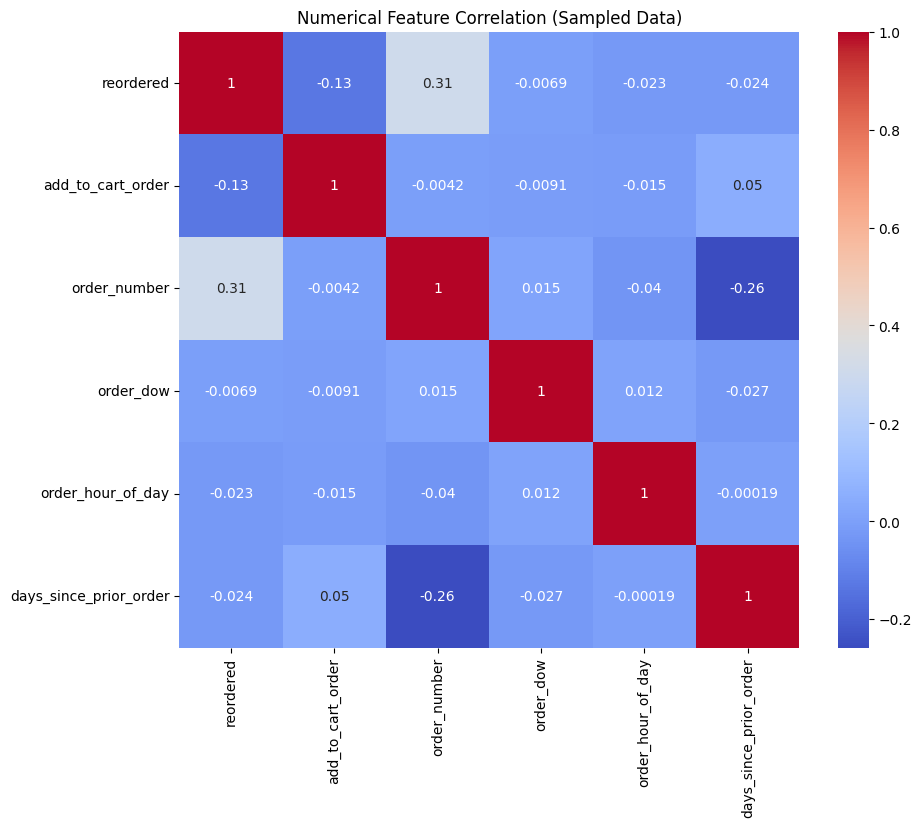

In [107]:
# إذا علق الجهاز، استخدم هاي بدالها:
cols_for_corr = [
    'reordered', 
    'add_to_cart_order', 
    'order_number', 
    'order_dow', 
    'order_hour_of_day', 
    'days_since_prior_order'
]

sample_corr = complete_df[cols_for_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(sample_corr, annot=True, cmap='coolwarm')
plt.title("Numerical Feature Correlation (Sampled Data)")
plt.show()

VIF

In [70]:
!pip install statsmodels

In [109]:
df.isnull().sum()

C:\Users\owndi\AppData\Local\Temp\ipykernel_23324\286341606.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.isnull().sum()
c:\Users\owndi\anaconda3\Lib\site-packages\IPython\lib\pretty.py:794: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  output = repr(obj)


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
                    ..
order_month          0
order_season         0
time_of_day          0
is_weekend           0
log_days_gap         0
Length: 174, dtype: Sparse[int64, False]

In [110]:
reduce_memo(df)

C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_white wines,aisle_yogurt,order_hour,order_day,order_year,order_month,order_season,time_of_day,is_weekend,log_days_gap
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,...,False,False,9,5,2024.0,1.0,Winter,Morning,0,2.197266
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,...,False,False,9,5,2024.0,1.0,Winter,Morning,0,2.197266
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,...,False,False,9,5,2024.0,1.0,Winter,Morning,0,2.197266
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,...,False,False,9,5,2024.0,1.0,Winter,Morning,0,2.197266
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,...,False,False,9,5,2024.0,1.0,Winter,Morning,0,2.197266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,25247,prior,24,...,False,False,6,2,2024.0,1.0,Winter,Morning,0,3.091797
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,25247,prior,24,...,False,False,6,2,2024.0,1.0,Winter,Morning,0,3.091797
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,25247,prior,24,...,False,False,6,2,2024.0,1.0,Winter,Morning,0,3.091797
32434487,3421083,24852,9,1,Banana,24,4,25247,prior,24,...,False,False,6,2,2024.0,1.0,Winter,Morning,0,3.091797


In [72]:
null_columns = complete_df.columns[complete_df.isna().any()].tolist()
null_columns


[]

In [125]:
#بدي استخدم VIF , هاض عباره عن فنكشن رياضي ببين قديش في ارتباط وتكرار بين الاعمده نفسهم 
#الهدف منه اني اشوف شو في اعمده فيهم تشابه كبير وبقدمو نفس المعلومه تقريبا عشان احذف واحد منهم
num_cols = df.select_dtypes(include=['number']).columns.tolist()


from statsmodels.stats.outliers_influence import variance_inflation_factor
SAMPLE_SIZE = 50000 
V = df[num_cols].sample(n=SAMPLE_SIZE , random_state = 42)

vif = pd.DataFrame()
vif["feature"] = V[num_cols].columns
vif["VIF"] = [variance_inflation_factor(V.values , i) for i in range(V.shape[1])]

#تحت 5 ممتاز
#بين ال 6 وال 10 مقبول
#اكثر من هيك بدك تشوف شو و وين في ترابط غير مهم وتبلش تحذف
#ال inf حذف مباشره

vif.sort_values("VIF" , ascending = True)

,feature,VIF
6,order_number,1.909668
2,add_to_cart_order,2.351767
4,department_id,3.381271
5,user_id,3.787810
0,order_id,3.803426
10,is_weekend,3.985254
1,product_id,4.024918
3,aisle_id,4.238826
7,order_dow,6.731156
11,log_days_gap,8.089639


In [117]:
train_df=df.copy()

In [ ]:
cols_to_drop = [
    'order_hour',           # مكرر
    'order_day',            # مكرر
    'days_since_prior_order', # استبدلناه بالـ log
    'order_year',           # ثابت وما بيفيد
    'eval_set'              #   عمود ما بفيد بس انه بحكيلي هاي للتدريب هاي للماضي وهيك يعني بس
]
train_df=train_df.drop(columns=cols_to_drop,inplace=True, errors='ignore')

8-  Imbalanced data handling (classification)


In [ ]:
train_df['reordered']
plt.figure(figsize=(6,6))
sns.countplot(x=complete_df['reordered'])
plt.title("Reorderd vs Not Reorderd")
plt.show()